# Stock Price Prediction using Random Forest

## Introduction
Stock price prediction is a crucial task in financial markets. In this project, we use the **Random Forest Regressor** to predict stock prices based on historical data. The goal is to analyze trends and extract meaningful patterns from time-series stock data.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

## Dataset
- **Source**: Amazon stock data (2000-2025)
- **Features**: Open, High, Low, Close, Volume
- **Target Variable**: Closing Price


In [2]:
df = pd.read_csv(r'E:\study material\data analyst\datasets\Amazon stock data 2000-2025.csv')

In [3]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [4]:
df.describe()

,open,high,low,close,adj_close,volume
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6.321000e+03
mean,44.736023,45.251977,44.176568,44.729400,44.729400,1.180771e+08
std,59.578629,60.241809,58.852822,59.562415,59.562415,9.758263e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.500750e+07
25%,2.363500,2.415500,2.306000,2.364000,2.364000,6.215930e+07
50%,11.602000,11.737500,11.420000,11.595000,11.595000,9.595200e+07
75%,85.140503,85.779999,83.903000,84.817497,84.817497,1.433920e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


# Data Preprocessing & Feature Engineering
- Convert the `date` column to **datetime format**.
- Extract new time-based features:
  - `year`, `month`, `day`, `day_of_week`, `is_weekend`.
- Remove unnecessary columns to avoid redundancy.


In [5]:
df['date'] = pd.to_datetime(df['date'], utc=True).dt.tz_convert(None)

# Extract new time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Sat/Sun, 0 for Mon-Fri

# Drop the original date column since we extracted useful features
df.drop(columns=['date'], inplace=True)

In [6]:
X = df.drop(columns=['close'])  # Drop 'close' as it's the target variable
y = df['close']  # Predicting the 'close' price

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape of datasets
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (5056, 10) (5056,)
Testing Data Shape: (1265, 10) (1265,)


## Model Selection, Training & Evaluation

### Model Selection & Training
- Use `RandomForestRegressor` from `sklearn.ensemble`.
- Perform **train-test split** to divide the dataset into training and testing sets.
- Tune hyperparameters using `GridSearchCV` to find the best model configuration.
- Use `cross_val_score` for model validation.

### Model Evaluation
- Evaluate model performance using:
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **R-squared (R²) Score**


In [7]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.04685781208941133
Mean Squared Error (MSE): 0.03791196556905325
Root Mean Squared Error (RMSE): 0.19470995241397715
R-squared Score (R²): 0.9999890886329067


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
df_no_outliers = df[(np.abs(stats.zscore(df['volume'])) < 3)]

# Print the number of rows removed
print(f"Rows removed due to outliers: {df.shape[0] - df_no_outliers.shape[0]}")

Rows removed due to outliers: 96


In [9]:
columns_to_drop = ['date', 'close']  # Adjust as needed

# Drop only if they exist in the dataframe
existing_columns = [col for col in columns_to_drop if col in df_no_outliers.columns]

X_no_outliers = df_no_outliers.drop(columns=existing_columns)
y_no_outliers = df_no_outliers['close']

In [10]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

In [11]:
rf_no_outliers = RandomForestRegressor(random_state=42)
rf_no_outliers.fit(X_train_no, y_train_no)

# Predict on test data
y_pred_no_outliers = rf_no_outliers.predict(X_test_no)

# Evaluate model performance
mae_no = mean_absolute_error(y_test_no, y_pred_no_outliers)
mse_no = mean_squared_error(y_test_no, y_pred_no_outliers)
rmse_no = mean_squared_error(y_test_no, y_pred_no_outliers, squared=False)
r2_no = r2_score(y_test_no, y_pred_no_outliers)

# Print results
print(f"Model Performance After Removing Outliers:")
print(f"MAE: {mae_no}")
print(f"MSE: {mse_no}")
print(f"RMSE: {rmse_no}")
print(f"R² Score: {r2_no}")

Model Performance After Removing Outliers:
MAE: 0.049045098110853835
MSE: 0.033349042635589896
RMSE: 0.18261720246348617
R² Score: 0.9999901368818491


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples in a leaf
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit on training data
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred_optimized = best_rf.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
mae = mean_absolute_error(y_test, y_pred_optimized)
mse = mean_squared_error(y_test, y_pred_optimized)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_optimized)

print("Optimized Model Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Optimized Model Performance:
MAE: 0.0467105120399682
MSE: 0.04027218944962208
RMSE: 0.2006793199351196
R² Score: 0.9999884093415854


In [14]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 1.0000


###  Amazon Stock Price Over Time
- A time-series plot showing how Amazon's stock price has changed over the years.
- Helps us observe long-term trends, seasonality, and fluctuations in stock prices.
- Useful for understanding market trends before making predictions.


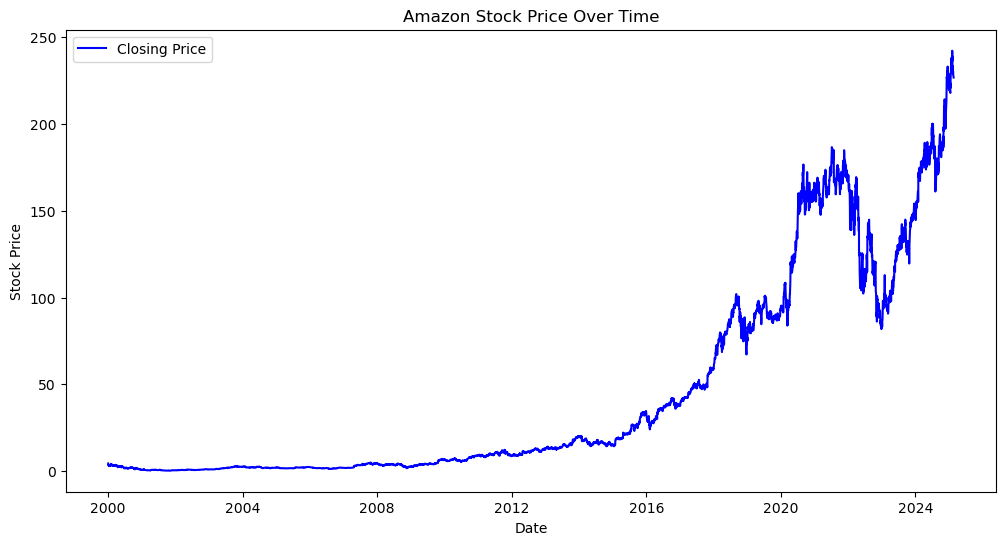

In [15]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Amazon Stock Price Over Time")
plt.legend()
plt.show()

### Feature Correlation Heatmap
- Displays the correlation between different features in the dataset.
- A high correlation (close to **+1 or -1**) indicates a strong relationship between two variables.
- Features with high correlation may provide redundant information, affecting model performance.


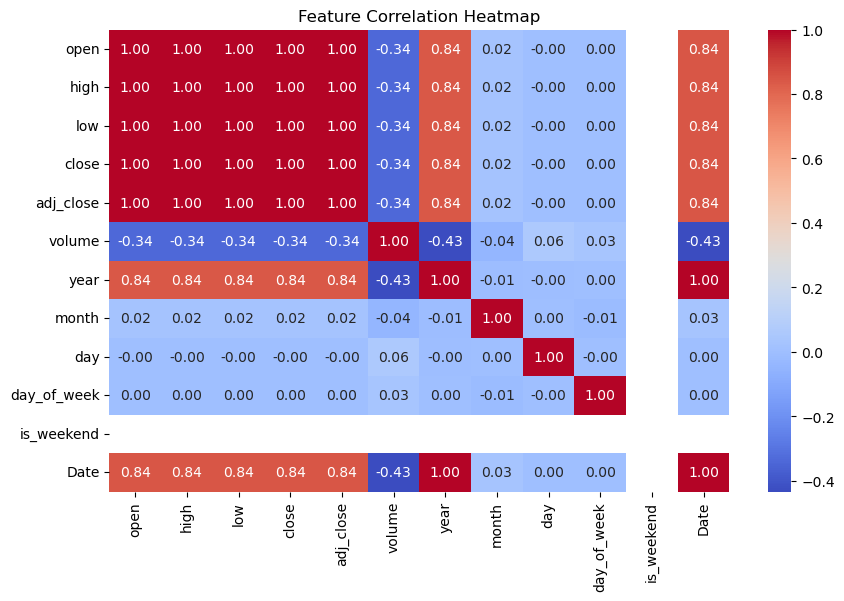

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Importance (Random Forest)
- **Random Forest** provides an intrinsic measure of **feature importance**.
- This visualization helps us identify which features contribute the most to stock price prediction.
- The higher the importance score, the more significant the feature in influencing stock prices.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\1732182645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


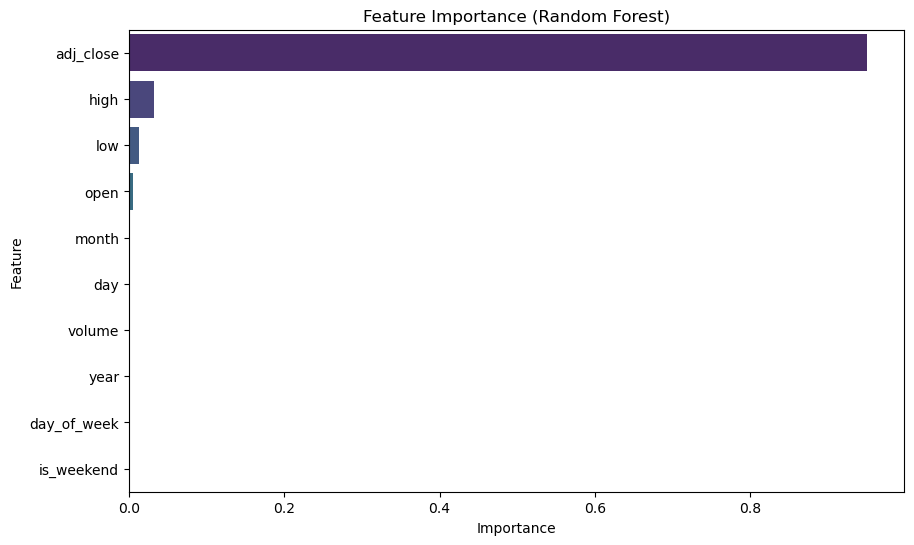

In [17]:
feature_importance = rf_model.feature_importances_  # Assuming rf_model is your trained RandomForest model
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

### Actual vs. Predicted Stock Prices
- This plot compares the actual stock prices with the predicted values from the **Random Forest Regressor**.
- It helps us assess how well the model captures stock price trends.
- A perfect model would have points aligned along the **diagonal line** (y = x).

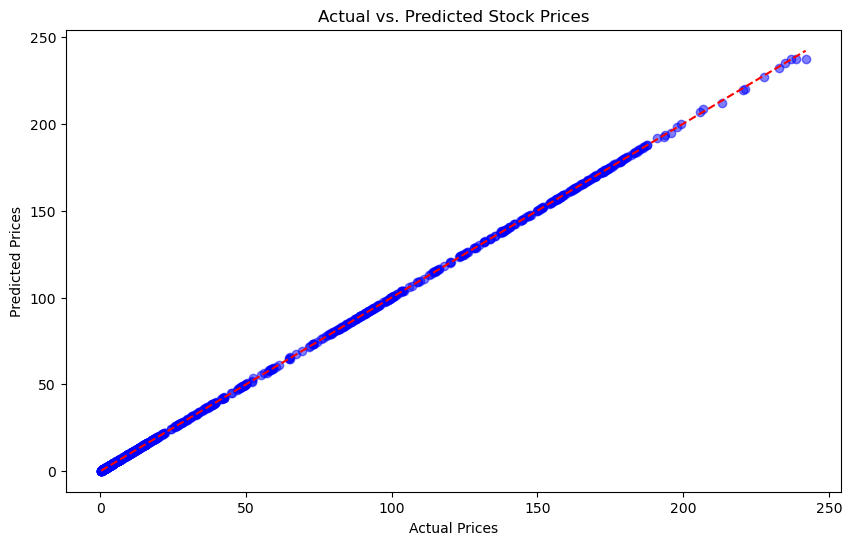

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")
plt.show()

## Conclusion
- Summary of key findings.
- Best-performing model and hyperparameters.
- Recommendations for further improvements.

## Future Work
- Experiment with deep learning models (LSTM, Transformer-based models).
- Incorporate external factors (news sentiment, macroeconomic indicators).
- Deploy the model as a **web app using Flask or Streamlit**.